In [1]:
!wget https://raw.githubusercontent.com/ACloudGuru-Resources/Course_AWS_Certified_Machine_Learning/master/Chapter6/ufo_fullset.csv

--2020-11-04 14:19:31--  https://raw.githubusercontent.com/ACloudGuru-Resources/Course_AWS_Certified_Machine_Learning/master/Chapter6/ufo_fullset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.24.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.24.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2495948 (2.4M) [text/plain]
Saving to: ‘ufo_fullset.csv’

ufo_fullset.csv     100%[===================>]   2.38M  --.-KB/s    in 0.04s   

2020-11-04 14:19:31 (57.9 MB/s) - ‘ufo_fullset.csv’ saved [2495948/2495948]



In [8]:
import pandas as pd

ufo_df = pd.read_csv("ufo_fullset.csv")
ufo_df

,reportedTimestamp,eventDate,eventTime,shape,duration,witnesses,weather,firstName,lastName,latitude,longitude,sighting,physicalEvidence,contact,researchOutcome
0,1977-04-04T04:02:23.340Z,1977-03-31,23:46,circle,4,1,rain,Ila,Bashirian,47.329444,-122.578889,Y,N,N,explained
1,1982-11-22T02:06:32.019Z,1982-11-15,22:04,disk,4,1,partly cloudy,Eriberto,Runolfsson,52.664913,-1.034894,Y,Y,N,explained
2,1992-12-07T19:06:52.482Z,1992-12-07,19:01,circle,49,1,clear,Miller,Watsica,38.951667,-92.333889,Y,N,N,explained
3,2011-02-24T21:06:34.898Z,2011-02-21,20:56,disk,13,1,partly cloudy,Clifton,Bechtelar,41.496944,-71.367778,Y,N,N,explained
4,1991-03-09T16:18:45.501Z,1991-03-09,11:42,circle,17,1,mostly cloudy,Jayda,Ebert,47.606389,-122.330833,Y,N,N,explained
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,2019-01-18T14:41:45.346Z,2019-01-14,07:25,square,95,10,snow,Taryn,Osinski,42.033333,-87.733333,Y,N,N,unexplained
17996,2016-09-20T23:24:30.488Z,2016-09-14,13:27,circle,55,10,stormy,Derick,Pouros,43.004444,-71.348889,Y,N,N,explained
17997,1977-03-10T13:48:27.305Z,1977-03-06,21:59,circle,39,10,partly cloudy,Judah,Purdy,36.866389,-83.888889,Y,N,N,explained
17998,1971-07-23T13:22:36.190Z,1971-07-18,13:59,square,28,10,snow,Imelda,Botsford,35.385833,-94.398333,Y,N,N,unexplained


In [9]:
ufo_df.weather.unique()

array(['rain', 'partly cloudy', 'clear', 'mostly cloudy', 'fog', 'snow',
       'stormy'], dtype=object)

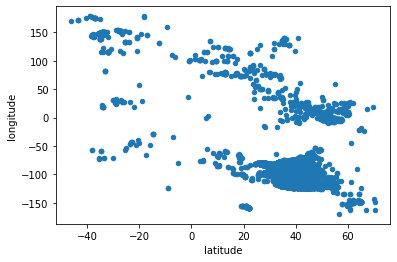

In [20]:
# only keep long/lat

ufo_df = ufo_df[['latitude', 'longitude']]
ufo_df.plot(kind='scatter', x='latitude', y='longitude')

In [17]:
ufo_np_arr = ufo_df.to_numpy().astype('float32')

In [21]:
from sagemaker import get_execution_role
role = get_execution_role()

In [26]:
from sagemaker import KMeans

bucket = "preshen-sagemaker-sme-project"
output_path = 's3://{}/kmeans_highlevel_example/data'.format(bucket)


kmeans = KMeans(role=role,
                train_instance_count=1,
                train_instance_type='ml.c4.xlarge',
                output_path=output_path,
                k=10)

In [27]:
%%time

kmeans.fit(kmeans.record_set(ufo_np_arr))

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-11-04 14:58:10 Starting - Starting the training job...
2020-11-04 14:58:12 Starting - Launching requested ML instances......
2020-11-04 14:59:20 Starting - Preparing the instances for training.........
2020-11-04 15:01:00 Downloading - Downloading input data...
2020-11-04 15:01:38 Training - Training image download completed. Training in progress.
2020-11-04 15:01:38 Uploading - Uploading generated training model
2020-11-04 15:01:38 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/04/2020 15:01:28 INFO 140675512657728] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method

Training seconds: 38
Billable seconds: 38
CPU times: user 701 ms, sys: 24.1 ms, total: 725 ms
Wall time: 3min 42s


In [28]:
# using TSNE for visualizing first 10000 data points from 1979 dataset
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca', random_state=1200)
X_tsne = tsne.fit_transform(ufo_np_arr)

plt.figure(figsize=(6, 5))
X_tsne_1000 = X_tsne[:1000]
plt.scatter(X_tsne_1000[:, 0], X_tsne_1000[:, 1])
plt.show()

NameError: name 'plt' is not defined

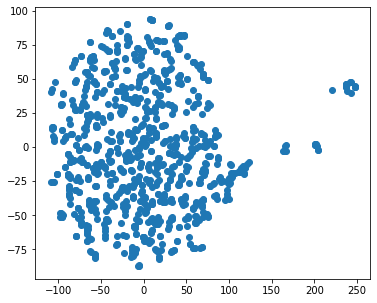

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
X_tsne_1000 = X_tsne[:1000]
plt.scatter(X_tsne_1000[:, 0], X_tsne_1000[:, 1])
plt.show()

In [35]:
import boto3
s3_client = boto3.client('s3')


key = 'kmeans_highlevel_example/data/kmeans-2020-11-04-14-58-10-284/output/model.tar.gz'

s3_client.download_file(bucket, key, 'model.tar.gz')

!tar -xvf model.tar.gz

model_algo-1
state_2b4f4b6d-d11a-4f65-ab47-b6e5d0083772


In [38]:
!pip install mxnet
!pip install descartes

     |████████████████████████████████| 55.0 MB 152 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [55]:
import mxnet as mx

kmeans_model=mx.ndarray.load('model_algo-1')

AttributeError: 'list' object has no attribute 'asnumpy'

In [74]:
kmeans_centroids = kmeans_model[0].asnumpy()


array([[  28.12654  ,  -80.63828  ],
       [  48.83291  ,    3.8039398],
       [  47.780388 , -122.33256  ],
       [ -32.115215 ,  146.20006  ],
       [  39.2766   ,  -85.39296  ],
       [  17.55128  ,   94.15697  ],
       [  41.435036 ,  -74.46046  ],
       [  35.65189  , -117.27756  ],
       [  35.863693 ,  -97.604416 ],
       [  21.643463 , -157.81377  ]], dtype=float32)

In [83]:
kmeans_centroids[:,0]

array([ -80.63828  ,    3.8039398, -122.33256  ,  146.20006  ,
        -85.39296  ,   94.15697  ,  -74.46046  , -117.27756  ,
        -97.604416 , -157.81377  ], dtype=float32)

In [86]:
import geopandas
import matplotlib.pyplot as plt
import descartes


gdf = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(kmeans_centroids[:,1], (kmeans_centroids[:,0])))

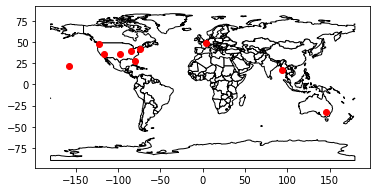

In [87]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')
